# Miniproject Kevin Jetten

First of all I will import the data and clean it as far as it's needed.

In [1]:
import pandas as pd

dataset_location = "..\ML\Miniproject\dataset_diabetes\diabetic_data.csv"
data = pd.read_csv(dataset_location)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

# Plots about the data

I will now make some plots about the data. The plots will be used to determine which machine learning algorithm will be used. There are too many features to all put the in one decent scatter plot, this is why I will filter the data and make multiple plots.  
Not every record has certain attributes, like weight, I will first determine the importance of these. This was I can make thought out decisions about the cleaning and usage of the data

These first few plots will be based on basic and general information about the patient

In [30]:
common_info_frame = pd.DataFrame({'encounter_id': data['encounter_id'],'age': data['age'], 'gender': data['gender'], 'weight': data['weight'],
                                  'time_in_hospital': data['time_in_hospital']})
# I also remove the '20' records, there are only three and I expect they should be 200+ but I cant be certain.
common_info_frame = common_info_frame[~common_info_frame.weight.isin(["20"])]
common_info_frame = common_info_frame[common_info_frame.gender.isin(["Male", "Female"])]

common_info_frame['age'] = common_info_frame['age'].apply(lambda x: x[1:-1])
common_info_frame['weight'] = common_info_frame['weight'].apply(lambda x: x[1:-1])
common_info_frame.head(5)



,age,encounter_id,gender,time_in_hospital,weight
0,0-10,2278392,Female,1,
1,10-20,149190,Female,3,
2,20-30,64410,Female,2,
3,30-40,500364,Male,2,
4,40-50,16680,Male,1,


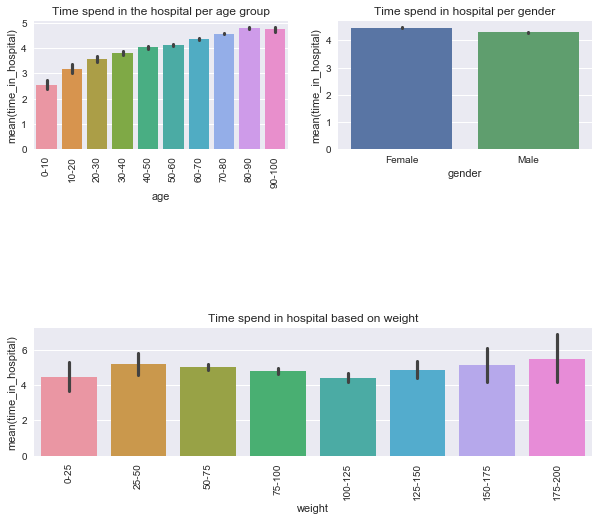

In [31]:
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib 

matplotlib.rcParams['figure.figsize'] = 10,8

# Create 3x2 sub plots
gs = gridspec.GridSpec(3, 2)
pl.figure()
ax1 = pl.subplot(gs[0, 0])  # row 0, col 0
ax2 = pl.subplot(gs[0, 1])  # row 0, col 1
ax3 = pl.subplot(gs[2, :])  # row 1, span all columns

# First plot (from left to right) is about the average time spend in the hospital grouped by their age group.
sns.barplot('age',  # Horizontal axis
            'time_in_hospital',  # Vertical axis
            data=common_info_frame,  # Data source
            ax=ax1,
            order=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
            )
ax1.set_title('Time spend in the hospital per age group')
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# The second plot is about the average time spend in the hospital grouped by gender.
sns.barplot('gender',  # Horizontal axis
            'time_in_hospital',  # Vertical axis
            data=common_info_frame,  # Data source
            ax=ax2,
            )
ax2.set_title('Time spend in hospital per gender')

# The third plot is about the average time spend in the hospital grouped by how much the patient weighs.
sns.barplot('weight',  # Horizontal axis
            'time_in_hospital',  # Vertical axis
            data=common_info_frame,  # Data source
            ax=ax3,
            order=["0-25", "25-50", "50-75", "75-100", "100-125", "125-150", "150-175", "175-200"]
            )
ax3.set_title('Time spend in hospital based on weight')
for label in ax3.get_xticklabels():
    label.set_rotation(90)

plt.show()


There are ALOT of different medicines that the patient can use which are present in this dataset. I want to find out which are the ones that have the most impact on how long a patient will stay in the hospital

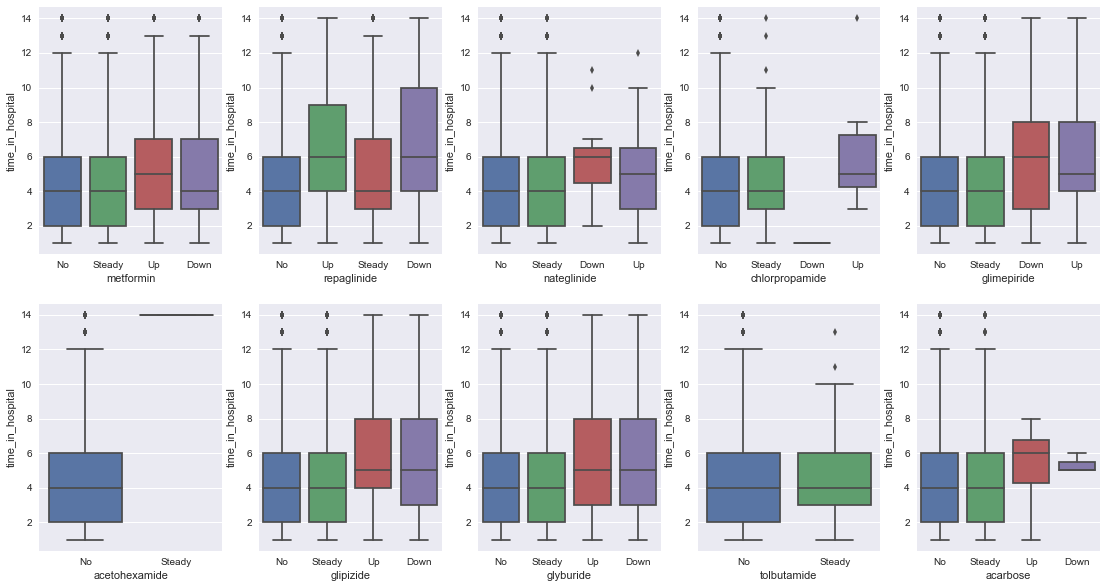

In [32]:
import matplotlib 
matplotlib.rcParams['figure.figsize'] = 19,10

first_group_medicine = pd.DataFrame(
    {'encounter_id': data['encounter_id'], 'time_in_hospital': data['time_in_hospital'], 'metformin': data['metformin'],
     'repaglinide': data['repaglinide'],
     'nateglinide': data['nateglinide'], 'chlorpropamide': data['chlorpropamide'], 'glimepiride': data['glimepiride'],
     'acetohexamide': data['acetohexamide'], 'glipizide': data['glipizide'], 'glyburide': data['glyburide'],
     'tolbutamide': data['tolbutamide'], 'pioglitazone': data['pioglitazone'], 'rosiglitazone': data['rosiglitazone'],
     'acarbose': data['acarbose']
     })
gs = gridspec.GridSpec(2, 5)

pl.figure()
ax1 = pl.subplot(gs[0, 0])  
ax2 = pl.subplot(gs[0, 1])  
ax3 = pl.subplot(gs[0, 2]) 
ax4 = pl.subplot(gs[0, 3])  
ax5 = pl.subplot(gs[0, 4])  
ax6 = pl.subplot(gs[1, 0]) 
ax7 = pl.subplot(gs[1, 1])  
ax8 = pl.subplot(gs[1, 2])  
ax9 = pl.subplot(gs[1, 3])  
ax10 = pl.subplot(gs[1, 4])  

sns.boxplot(x="metformin", y="time_in_hospital", data=first_group_medicine, ax=ax1)
sns.boxplot(x="repaglinide", y="time_in_hospital", data=first_group_medicine, ax=ax2)
sns.boxplot(x="nateglinide", y="time_in_hospital", data=first_group_medicine, ax=ax3)
sns.boxplot(x="chlorpropamide", y="time_in_hospital", data=first_group_medicine, ax=ax4)
sns.boxplot(x="glimepiride", y="time_in_hospital", data=first_group_medicine, ax=ax5)
sns.boxplot(x="acetohexamide", y="time_in_hospital", data=first_group_medicine, ax=ax6)
sns.boxplot(x="glipizide", y="time_in_hospital", data=first_group_medicine, ax=ax7)
sns.boxplot(x="glyburide", y="time_in_hospital", data=first_group_medicine, ax=ax8)
sns.boxplot(x="tolbutamide", y="time_in_hospital", data=first_group_medicine, ax=ax9)
sns.boxplot(x="acarbose", y="time_in_hospital", data=first_group_medicine, ax=ax10)

plt.show()


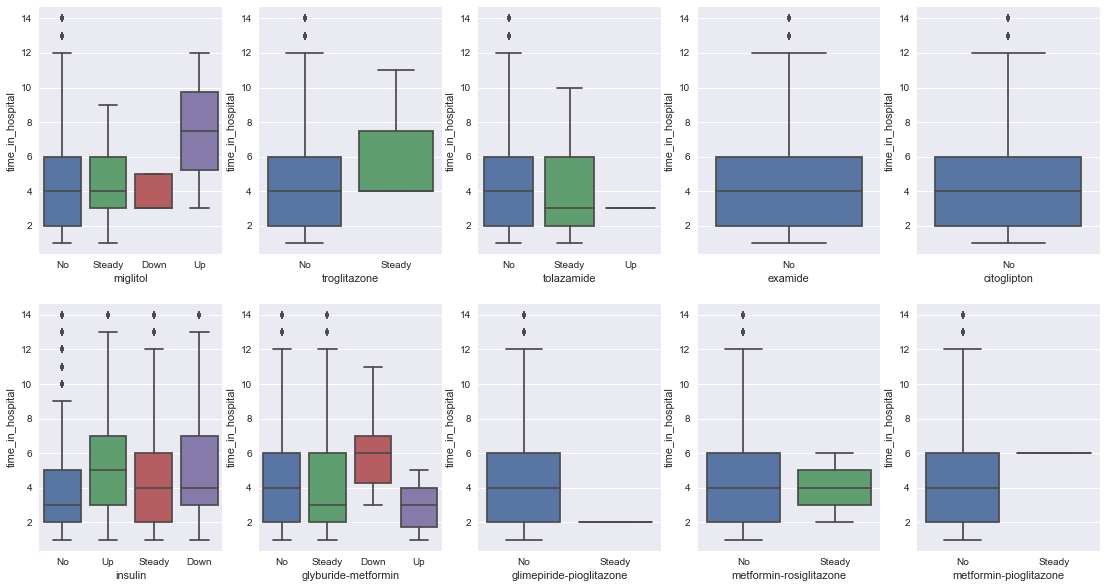

In [ ]:
matplotlib.rcParams['figure.figsize'] = 19,10
second_group_medicine = pd.DataFrame(
    {'time_in_hospital': data['time_in_hospital'], 'miglitol': data['miglitol'], 'troglitazone': data['troglitazone'],
     'tolazamide': data['tolazamide'],
     'examide': data['examide'], 'citoglipton': data['citoglipton'], 'insulin': data['insulin'],
     'glyburide-metformin': data['glyburide-metformin'], 'glipizide-metformin': data['glipizide-metformin'],
     'glimepiride-pioglitazone': data['glimepiride-pioglitazone'],
     'metformin-rosiglitazone': data['metformin-rosiglitazone'],
     'metformin-pioglitazone': data['metformin-pioglitazone'] })

gs = gridspec.GridSpec(2, 5)

pl.figure()
ax1 = pl.subplot(gs[0, 0])  
ax2 = pl.subplot(gs[0, 1])  
ax3 = pl.subplot(gs[0, 2]) 
ax4 = pl.subplot(gs[0, 3])  
ax5 = pl.subplot(gs[0, 4])  
ax6 = pl.subplot(gs[1, 0]) 
ax7 = pl.subplot(gs[1, 1])  
ax8 = pl.subplot(gs[1, 2])  
ax9 = pl.subplot(gs[1, 3])  
ax10 = pl.subplot(gs[1, 4])  

sns.boxplot(x="miglitol", y="time_in_hospital", data=second_group_medicine, ax=ax1)
sns.boxplot(x="troglitazone", y="time_in_hospital", data=second_group_medicine, ax=ax2)
sns.boxplot(x="tolazamide", y="time_in_hospital", data=second_group_medicine, ax=ax3)
sns.boxplot(x="examide", y="time_in_hospital", data=second_group_medicine, ax=ax4)
sns.boxplot(x="citoglipton", y="time_in_hospital", data=second_group_medicine, ax=ax5)
sns.boxplot(x="insulin", y="time_in_hospital", data=second_group_medicine, ax=ax6)
sns.boxplot(x="glyburide-metformin", y="time_in_hospital", data=second_group_medicine, ax=ax7)
sns.boxplot(x="glimepiride-pioglitazone", y="time_in_hospital", data=second_group_medicine, ax=ax8)
sns.boxplot(x="metformin-rosiglitazone", y="time_in_hospital", data=second_group_medicine, ax=ax9)
sns.boxplot(x="metformin-pioglitazone", y="time_in_hospital", data=second_group_medicine, ax=ax10)

plt.show()

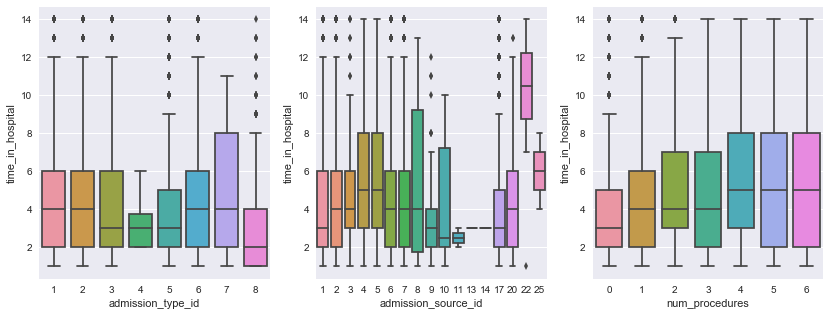

In [34]:
matplotlib.rcParams['figure.figsize'] = 19,5
admissions = pd.DataFrame({'admission_type_id': data['admission_type_id'],
                                      'admission_source_id': data['admission_source_id'],
                                      'num_lab_procedures': data['num_lab_procedures'],
                                      'num_procedures': data['num_procedures'],
                                      'num_medications': data['num_medications'],
                                      'number_outpatient': data['number_outpatient'],
                                      'number_emergency': data['number_emergency'],
                                      'number_inpatient': data['number_inpatient'],
                                      'number_diagnoses': data['number_diagnoses'],
                                     'time_in_hospital':data['time_in_hospital']})

gs = gridspec.GridSpec(1, 4)

pl.figure()
ax1 = pl.subplot(gs[0, 0])  
ax2 = pl.subplot(gs[0, 1])  
ax3 = pl.subplot(gs[0, 2]) 

sns.boxplot(x="admission_type_id", y="time_in_hospital", data=admissions, ax=ax1)
sns.boxplot(x="admission_source_id", y="time_in_hospital", data=admissions, ax=ax2)
sns.boxplot(x="num_procedures", y="time_in_hospital", data=admissions, ax=ax3)

plt.show()

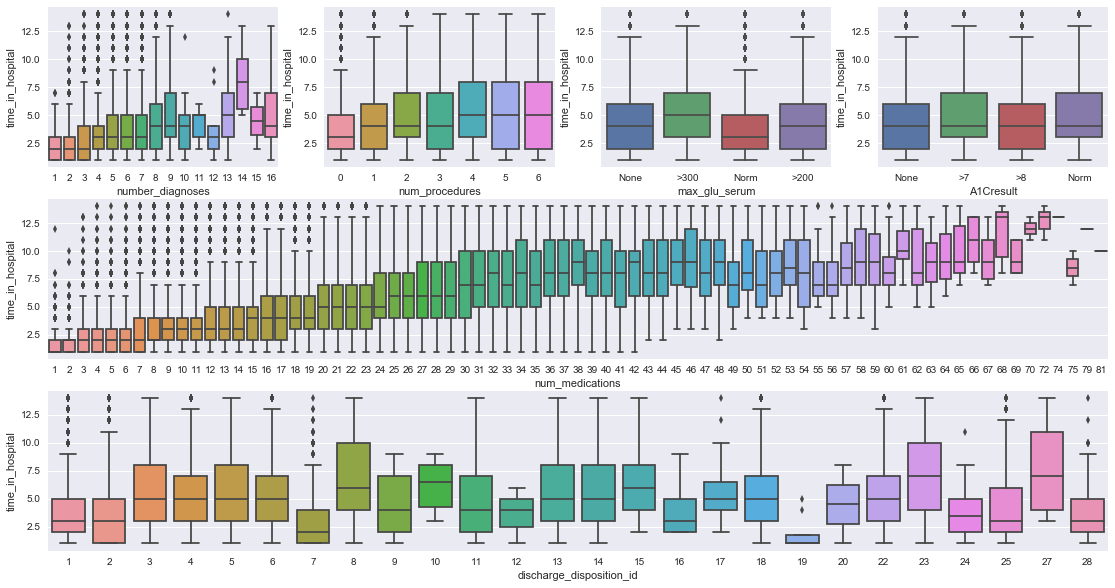

In [41]:
matplotlib.rcParams['figure.figsize'] = 19,10

number_cases = pd.DataFrame(
    {'number_diagnoses': data['number_diagnoses'], 
     'num_procedures': data['num_procedures'], 
     'max_glu_serum': data['max_glu_serum'], 
     'A1Cresult': data['A1Cresult'], 
     'discharge_disposition_id': data['discharge_disposition_id'], 
     'num_medications': data['num_medications'], 
     'time_in_hospital': data['time_in_hospital']})
gs = gridspec.GridSpec(3, 4)

pl.figure()
ax1 = pl.subplot(gs[0, 0])
ax2 = pl.subplot(gs[0, 1])
ax3 = pl.subplot(gs[0, 2])
ax4 = pl.subplot(gs[0, 3])
ax5 = pl.subplot(gs[1, :])
ax6 = pl.subplot(gs[2, :])

sns.boxplot(x="number_diagnoses", y="time_in_hospital", data=number_cases, ax=ax1)
sns.boxplot(x="num_procedures", y="time_in_hospital", data=number_cases, ax=ax2)
sns.boxplot(x="max_glu_serum", y="time_in_hospital", data=number_cases, ax=ax3)
sns.boxplot(x="A1Cresult", y="time_in_hospital", data=number_cases, ax=ax4)
sns.boxplot(x="num_medications", y="time_in_hospital", data=number_cases, ax=ax5)
sns.boxplot(x="discharge_disposition_id", y="time_in_hospital", data=number_cases, ax=ax6)

plt.show()


I also created plots for number_emergency and number_inpatient but they had no clear correlation with the time spend in the hospital and the plots were very messy.


#Machine learning  


In [3]:
import numpy as np
# Created a method to easily transform all string columns to numeric
def series_to_numeric(serie):
    values = serie.unique()
    mapping = {}
    for value_number in np.arange(0,len(values)):
        mapping[values[value_number]]= value_number
    return mapping


In [205]:
dataset = data[~data.weight.isin(["20"])]
dataset = dataset[dataset.gender.isin(["Male", "Female"])]
#dataset = dataset[dataset.diag_1.apply(lambda x: x.isnumeric())]
#dataset = dataset[dataset.diag_2.apply(lambda x: x.isnumeric())]
#dataset = dataset[dataset.diag_3.apply(lambda x: x.isnumeric())]

y = dataset['time_in_hospital']
x = pd.DataFrame({
    #'age': dataset['age'].replace(series_to_numeric(dataset['age'])),
    #'admission_source_id': dataset['admission_source_id'],
    'num_medications': dataset['num_medications'],
    'number_diagnoses': dataset['number_diagnoses'],
    'readmitted': dataset['readmitted'].replace(series_to_numeric(dataset['readmitted'])),
    #'diag_1': dataset['diag_1'],
    #'diag_2': dataset['diag_2'],
    #'diag_3': dataset['diag_3'],
    #'number_inpatient': dataset['number_inpatient'],
    # 'num_lab_procedures': dataset['num_lab_procedures'],
     'num_procedures': dataset['num_procedures'],
    'admission_type_id': dataset['admission_type_id'].replace(series_to_numeric(dataset['admission_type_id'])),
    #'number_emergency': dataset['number_emergency'],
    #'repaglinide': dataset['repaglinide'].replace(series_to_numeric(dataset['repaglinide'])),
    #'miglitol': dataset['miglitol'].replace(series_to_numeric(dataset['miglitol'])),
    #'max_glu_serum': dataset['max_glu_serum'].replace(series_to_numeric(dataset['max_glu_serum'])),
    #'discharge_disposition_id': dataset['discharge_disposition_id'].replace(series_to_numeric(dataset['discharge_disposition_id'])),
    # 'troglitazone': dataset['troglitazone'].replace(series_to_numeric(dataset['troglitazone'])),
    #'tolazamide': dataset['tolazamide'].replace(series_to_numeric(dataset['tolazamide'])),
     #'insulin': dataset['insulin'].replace(series_to_numeric(dataset['insulin'])),
    #'glyburide-metformin': dataset['glyburide-metformin'].replace(series_to_numeric(dataset['glyburide-metformin'])),
    #'nateglinide': dataset['nateglinide'].replace(series_to_numeric(dataset['nateglinide'])),
    #'chlorpropamide': dataset['chlorpropamide'].replace(series_to_numeric(dataset['chlorpropamide'])),
    #'glipizide': dataset['glipizide'].replace(series_to_numeric(dataset['glipizide'])),
    #'acarbose': dataset['acarbose'].replace(series_to_numeric(dataset['acarbose'])),
})


<H3>Decision Tree </H3>  First I will create the proper training and test data and do a cross validation (k=5) on this set  

In [206]:
from sklearn import tree

clf1_tree = tree.DecisionTreeClassifier(max_features=2)

x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x, y, test_size=0.25, random_state=1)

cv_tree = KFold(len(y_train_tree), 5, shuffle=True, random_state=0)

scores_tree = cross_val_score(clf1_tree, x_train_tree, y_train_tree, cv=cv_tree)

print(scores_tree)
print("Mean score: {0:.3f} (+/-{1:.3f})".format(
    np.mean(scores_tree), sem(scores_tree)))


[ 0.1943662   0.19449722  0.19274109  0.19490304  0.19123428]
Mean score: 0.194 (+/-0.001)


In [199]:
clf1_tree.fit(x_train_tree, y_train_tree)

y_pred_tree = clf1_tree.predict(x_test_tree)
print(metrics.classification_report(y_test_tree, y_pred_tree.astype(int)))


             precision    recall  f1-score   support

          1       0.28      0.35      0.31      3546
          2       0.22      0.32      0.26      4306
          3       0.19      0.29      0.23      4406
          4       0.15      0.13      0.14      3607
          5       0.13      0.08      0.10      2403
          6       0.12      0.07      0.09      1851
          7       0.11      0.05      0.07      1485
          8       0.09      0.04      0.05      1100
          9       0.09      0.03      0.04       754
         10       0.06      0.02      0.03       585
         11       0.06      0.02      0.03       433
         12       0.06      0.01      0.02       378
         13       0.03      0.01      0.01       323
         14       0.03      0.01      0.01       264

avg / total       0.17      0.19      0.17     25441



<H3> Mini batch K-means</H3>  


In [200]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

reg_kmeans = MiniBatchKMeans(n_clusters=8,random_state=0, n_init=10, max_no_improvement=100)

x_train_kmeans, x_test_kmeans, y_train_kmeans, y_test_kmeans = train_test_split(x, y, test_size=0.25, random_state=0)

cv_kmeans = KFold(len(y_train_kmeans), 5, shuffle=True, random_state=0)

scores = cross_val_score(reg_kmeans, x_train_kmeans, y_train_kmeans, cv=cv_kmeans)

print(scores)
print("Mean score: {0:.3f} (+/-{1:.3f})".format(
    np.mean(scores), sem(scores)))


[-155345.07342215 -158729.83713835 -160968.16683188 -158338.70504558
 -152893.68061366]
Mean score: -157255.093 (+/-1410.782)


In [178]:
from sklearn import metrics

reg_kmeans.fit(x_train_kmeans, y_train_kmeans)
y_pred_kmeans = reg_kmeans.predict(x_test_kmeans)

print(metrics.classification_report(y_test_kmeans, y_pred_kmeans.astype(int)))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.23      0.28      0.25      2636
          2       0.04      0.01      0.02      3040
          3       0.20      0.30      0.24      3198
          4       0.13      0.13      0.13      2545
          5       0.09      0.02      0.03      1867
          6       0.03      0.06      0.04      1346
          7       0.11      0.01      0.02      1083
          8       0.00      0.00      0.00       811
          9       0.00      0.00      0.00       581
         10       0.00      0.00      0.00       383
         11       0.00      0.00      0.00       335
         12       0.00      0.00      0.00       233
         13       0.00      0.00      0.00       197
         14       0.00      0.00      0.00       195

avg / total       0.11      0.12      0.11     18450



C:\Users\Uber-Laptop\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Uber-Laptop\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


The reason I wanted to test out the regression algorithm first is because I had a gut feeling that it wouldn't do that great because it's not really a quantity we are predicting. Yes you can argue that we want to predict the quantity of days but it just doesn't feel right.  
<H3> Classification  </H3>
I will now implentent the SGD classifier. This is the perfect dataset for it because we are predicting the category in which the patient falls and the data is labeled and had more than 100k samples

In [179]:
from sklearn.linear_model import SGDClassifier

classifier_sgd = SGDClassifier(random_state=0)

x_train_sgd, x_test_sgd, y_train_sgd, y_test_sgd = train_test_split(x, y, test_size=0.25, random_state=2)

cv_sgd = KFold(len(y_train_sgd), 5, shuffle=True, random_state=0)

scores_sgd = cross_val_score(classifier_sgd, x_train_sgd, y_train_sgd, cv=cv_sgd)

print(scores_sgd)
print("Mean score: {0:.3f} (+/-{1:.3f})".format(
    np.mean(scores_sgd), sem(scores_sgd)))

[ 0.14182475  0.09403794  0.14507678  0.16829268  0.17777778]
Mean score: 0.145 (+/-0.015)


In [180]:
classifier_sgd.fit(x_train_sgd, y_train_sgd)
y_pred_sgd = classifier_sgd.predict(x_test_sgd)

print(metrics.classification_report(y_test_sgd, y_pred_sgd.astype(int)))

             precision    recall  f1-score   support

          1       0.27      0.00      0.00      2478
          2       0.26      0.02      0.04      3114
          3       0.00      0.00      0.00      3208
          4       0.14      0.99      0.24      2532
          5       0.00      0.00      0.00      1873
          6       0.00      0.00      0.00      1418
          7       0.00      0.00      0.00      1142
          8       0.00      0.00      0.00       789
          9       0.00      0.00      0.00       517
         10       0.10      0.06      0.07       413
         11       0.00      0.00      0.00       332
         12       0.00      0.00      0.00       234
         13       0.00      0.00      0.00       205
         14       0.00      0.00      0.00       195

avg / total       0.10      0.14      0.04     18450



C:\Users\Uber-Laptop\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
